In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import matplotlib.font_manager as fm
from tempfile import NamedTemporaryFile

from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

In [297]:
pt_serif = 'https://github.com/google/fonts/raw/a4f3deeca2d7547351ff746f7bf3b51f5528dbcf/ofl/ptserif/PT_Serif-Web-Regular.ttf'
google_font_response = requests.get(pt_serif)

font_name = None
font_prop = None
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
  font_name = f.name
  f.write(google_font_response.content)

  fm.fontManager.addfont(font_name)
  font_prop = fm.FontProperties(fname=font_name)
  sns.set(font=font_prop.get_name())

In [298]:
def create_heatmap_matrix(csv_name):
  df = pd.read_csv(csv_name, usecols=[0,1,2], names=['Player 1', 'Player 2', "Player 1's Wins"])
  df["Player 1's Wins"] = 2 - df["Player 1's Wins"]
  df['Player 1'] = df['Player 1'].astype(pd.Int64Dtype())
  df['Player 2'] = df['Player 2'].astype(pd.Int64Dtype())
  df = pd.pivot_table(df, index='Player 2', columns='Player 1', values="Player 1's Wins")

  colors = ["#cb67d8", "#e3e3e3", "#6790df"]
  color_scheme = sns.color_palette(colors)

  sns.set(rc={"figure.figsize":(9, 12)}, font_scale=1.1)
  sns.set_style(rc={"font.sans-serif":font_prop.get_name(), "axes.facecolor":"white"})
  sns.set_context(rc={"axes.labelsize": 18})
  g = sns.heatmap(
    df,
    annot=True, 
    cmap=color_scheme, 
    linewidths=1, 
    linecolor="white", 
    square=True, 
    cbar=False,
    mask=df.isnull(),
    # xticklabels=2,
    # yticklabels=2,
  )
  g.set(xlabel='Generation', ylabel=None)
  g.invert_yaxis()
  plt.tick_params(axis='x', bottom=False, labelbottom=True, labelrotation=0)
  plt.tick_params(axis='y', left=False, right=False, labelleft=False, labelright=True, labelrotation=0)

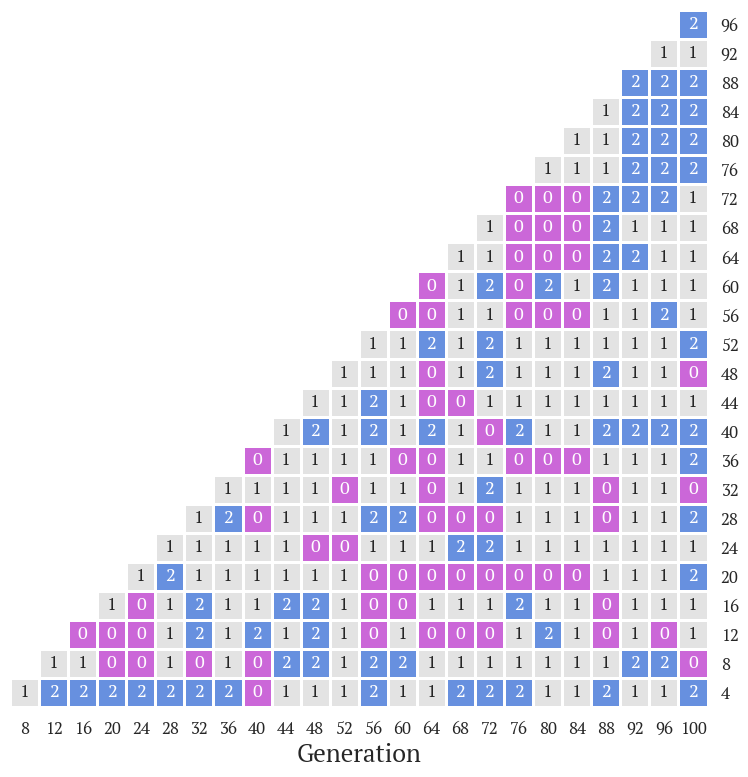

In [299]:
create_heatmap_matrix('exp2_agent_comparison.csv')

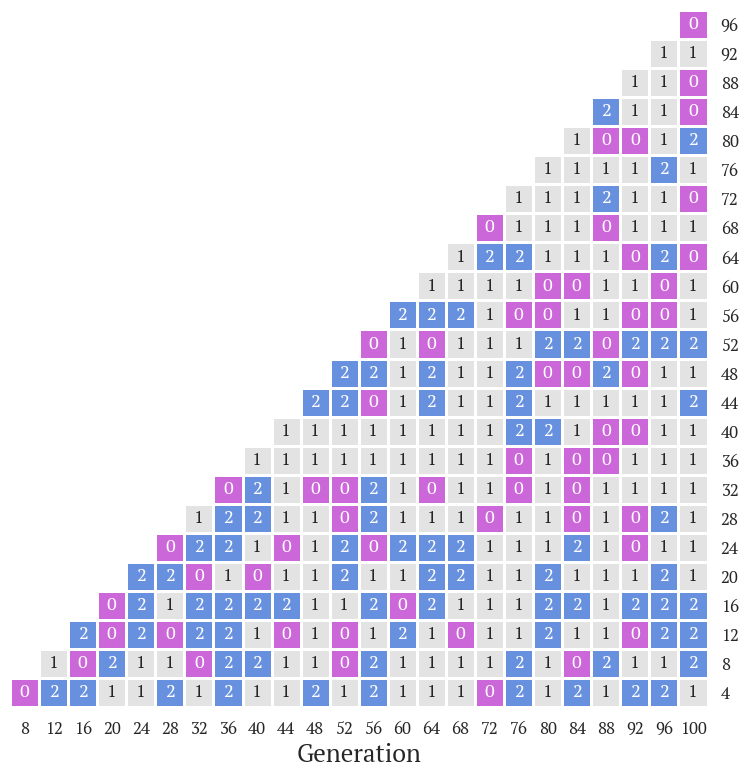

In [300]:
create_heatmap_matrix('exp3_agent_comparison.csv')